## Neural Network Classifier in Python and Numpy
In this notebook we develop a 2 layers shallow Neural Network with plain Python from scratch and only dependency is Numpy library for array and Linear Algebra operations

In [1]:
import numpy as np

In [20]:
class SimpleNeuralNetworkClassifier():
    def __init__(self, learning_rate, input_layer_size, hidden_layer_size, output_layer_size, epoch):        
        self.learning_rate = learning_rate
        # randomly initialize our weights
        self.W1 = np.random.randn(hidden_layer_size, input_layer_size) * 0.01
        self.b1 = np.zeros((hidden_layer_size,1))
        self.W2 = np.random.randn(output_layer_size, hidden_layer_size) * 0.01
        self.b2 = np.zeros((output_layer_size, 1))
        
        self.epoch = epoch
        
    def sigmoid(self, x): #sigmoid
        return 1/(1+np.exp(-x))
    
    def sigmoid_backprop(self, x): #sigmoid back propagation
        sigmoid = self.sigmoid(x)
        return sigmoid * (1-sigmoid)        
        

    def relu(self, x, back_propagated=False): #relu
        return np.maximum(0,x)
    
    def relu_backprop(self, x):
        dx = np.array(x, copy=True)
        dx[x <= 0] = 0
        dx[x > 0] = 1
        return dx   
    
    def forward_propagation(self, X):
        #forward propagation
        Z1 = self.W1.dot(X) + self.b1
        A1 = self.relu(Z1)
        Z2 = self.W2.dot(A1) + self.b2
        A2 = self.sigmoid(Z2)
        return Z1, A1, Z2, A2
    
    def cost_function(self, X, A2, Y):
        n = X.shape[1]             
        cost = -(1/n)*(Y.dot(np.log(A2).T) + (1-Y).dot(np.log(1-A2).T))
        cost = np.squeeze(cost)
        return cost
    
    def back_propagation(self, X, Y, Z1, A1, Z2, A2): 
        #back propagation
        n = X.shape[1]
        #derivative of wieght and bias to output layer
        dZ2 = A2 - Y
        dW2 = 1/n * (dZ2.dot(A1.T))
        db2 = 1/n * np.sum(dZ2, axis=1, keepdims=True)
        
        dZ1 = self.W2.T.dot(dZ2) * self.relu_backprop(Z1)
        dW1 = 1/n * dZ1.dot(X.T)
        db1 = 1/n * np.sum(dZ1, axis=1, keepdims=True)
        
        return dW1, dW2, db1, db2 

    def step_gradient(self, X, Y, learning_rate):
        #forward propagation
        Z1, A1, Z2, A2 = self.forward_propagation(X)
        #back propagation
        dW1, dW2, db1, db2  = self.back_propagation(X, Y, Z1, A1, Z2, A2)
        #update output weight and bias    
        self.W2 = self.W2 - (learning_rate * dW2)    
        self.b2 = self.b2 - (learning_rate * db2)
        #update hidden weight and bias
        self.W1 = self.W1 - (learning_rate * dW1)
        self.b1 = self.b1 - (learning_rate * db1)
        
        cost = self.cost_function(X, A2, Y)    
        return cost
    
    def fit(self, X, Y):
        X = X.T
        Y = Y.reshape(1, -1)
        costs = []
        for i in range(self.epoch):
            cost = self.step_gradient(X, Y, self.learning_rate)
            if i % 100 == 0:
                costs.append(cost)
                print("cost=", cost)
        return costs
    
    def predict(self, X):
        X = X.T       
        _, _, _, y_pred = self.forward_propagation(X)
        y_pred = y_pred.ravel()
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        return y_pred

## Handwritten Digits Classification with our own Neural Network
We load handwritten digit images from ScikitLearn data set. Since this network is only able to perform binary classification, we extract digit 0,1 and their label from the dataset. Then we splitted the data set to train and test set. We train our Neural Network with train set and predict the test set.    

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits(return_X_y=True)
labels = digits[1]
img = digits[0]
X = np.append(img[labels==0], img[labels==1] , axis=0)
y = np.append(labels[labels==0] , labels[labels==1], axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
nn_classifier = SimpleNeuralNetworkClassifier(0.0001, X_train.shape[1], 2, 1, 100000)

In [23]:
costs = nn_classifier.fit(X_train, y_train)

cost= 0.6925461602739317
cost= 0.6922898644551868
cost= 0.6920047873228016
cost= 0.6916816086547342
cost= 0.691309777902407
cost= 0.6908723417960436
cost= 0.6903543561210056
cost= 0.6897379852908669
cost= 0.6890036429283399
cost= 0.6881262215608743
cost= 0.6870768419353075
cost= 0.6858216381522362
cost= 0.6843213948119015
cost= 0.6825326811888427
cost= 0.6804025798407053
cost= 0.6778731058662627
cost= 0.674879087214502
cost= 0.6713538482006087
cost= 0.6672226151482306
cost= 0.6624066777824352
cost= 0.6568272902195763
cost= 0.6504196384819381
cost= 0.6431195473218629
cost= 0.6348966315125997
cost= 0.6257435656611392
cost= 0.6156653493428778
cost= 0.604717253085491
cost= 0.5929993060302042
cost= 0.5806384239892831
cost= 0.5678558897150813
cost= 0.5548265131799459
cost= 0.5417181971072744
cost= 0.5286565654791989
cost= 0.5157978564173581
cost= 0.5033207818205426
cost= 0.4912821910824839
cost= 0.4796338437150258
cost= 0.46840428293207254
cost= 0.4574797404292304
cost= 0.44682865269566796
c

cost= 0.0053328129220452545
cost= 0.005311780975938174
cost= 0.005290902144309074
cost= 0.005270174776158447
cost= 0.0052495972443174
cost= 0.005229168291894477
cost= 0.005208886849613256
cost= 0.005188750476409975
cost= 0.005168757636687711
cost= 0.005148906816596232
cost= 0.005129196580408582
cost= 0.005109625517629101
cost= 0.0050901920555789576
cost= 0.005070894763690093
cost= 0.00505173223128367
cost= 0.005032703067222295
cost= 0.005013805899569731
cost= 0.0049950393752577395
cost= 0.004976402159759823
cost= 0.0049578929367717975
cost= 0.004939510407898997
cost= 0.00492125329234998
cost= 0.004903120326636492
cost= 0.004885110264279626
cost= 0.004867221875521986
cost= 0.004849453947045752
cost= 0.004831805281696398
cost= 0.004814274698212086
cost= 0.004796861030958441
cost= 0.004779563129668761
cost= 0.0047623798591893435
cost= 0.0047453100992299185
cost= 0.004728352744119054
cost= 0.004711506702564439
cost= 0.004694770897417868
cost= 0.004678144265444884
cost= 0.00466162575709882


cost= 0.002278320420798223
cost= 0.002273880738646325
cost= 0.0022694567827232616
cost= 0.002265048472399519
cost= 0.002260655727588942
cost= 0.002256278468744113
cost= 0.0022519166168517863
cost= 0.002247570093428453
cost= 0.0022432388205158743
cost= 0.0022389227206766117
cost= 0.002234621716989743
cost= 0.002230335733046519
cost= 0.0022260646929461118
cost= 0.002221808521291388
cost= 0.002217567143184729
cost= 0.002213340484223909
cost= 0.0022091284704979686
cost= 0.002204931028583204
cost= 0.0022007480855391866
cost= 0.0021965795689046844
cost= 0.002192425406693866
cost= 0.0021882855273922946
cost= 0.002184159859953196
cost= 0.0021800483337935483
cost= 0.0021759508787903624
cost= 0.0021718674252769387
cost= 0.0021677979040391955
cost= 0.002163742246311905
cost= 0.0021597003837752348
cost= 0.00215567224855101
cost= 0.0021516577731992433
cost= 0.0021476568907145897
cost= 0.002143669534522843
cost= 0.002139695638477528
cost= 0.002135735136856455
cost= 0.0021317879643583627
cost= 0.0021

cost= 0.0014054044589164355
cost= 0.0014035650546822633
cost= 0.0014017300458013411
cost= 0.0013998994170956887
cost= 0.0013980731534559779
cost= 0.0013962512398411537
cost= 0.0013944336612780482
cost= 0.001392620402860969
cost= 0.0013908114889509592
cost= 0.0013890071752135022
cost= 0.0013872071354617244
cost= 0.0013854113550594224
cost= 0.001383619819436334
cost= 0.0013818325185990194
cost= 0.0013800495159619103
cost= 0.001378270714376313
cost= 0.0013764960995304699
cost= 0.0013747256571768447
cost= 0.0013729593731316816
cost= 0.0013711972332746763
cost= 0.001369439223548624
cost= 0.001367685329958993
cost= 0.0013659355385736366
cost= 0.00136418983552234
cost= 0.0013624482069965749
cost= 0.0013607106392490517
cost= 0.0013589771185934232
cost= 0.0013572476314039125
cost= 0.0013555221641149923
cost= 0.001353800703221023
cost= 0.0013520832352759088
cost= 0.0013503697468928003
cost= 0.0013486602247437247
cost= 0.00134695465555925
cost= 0.001345253026128192
cost= 0.0013435553232972644
cos

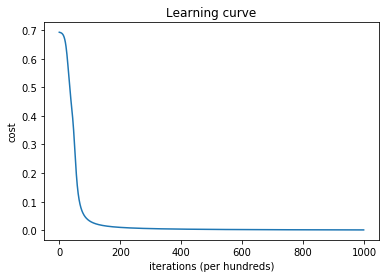

In [24]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning curve")
plt.show()

In [25]:
y_pred = nn_classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.ravel(), y_pred)

1.0

As shown in cell above, our Neural Network is able to get 100% accuracy in prediction of test set, It appears to be working as expected  

## Further Work and Notes 
We can enhance this implementation to support multi-class classification problem by replacing Sigmoid function with Softmax for the output layer.
Note that this implementation is to help us to understand internally how Neural Network works. We should use existing Open Source Packages / Framework which are production ready and fine tuned for performance for our actual projects.